# Practica 5

In [143]:
from deap import creator, tools, base, algorithms
import numpy as np
import random


class Tren:
    def __init__(self, numero_vagones, operacion, matricula):
        self.numero_vagones = numero_vagones
        self.operacion = operacion
        self.matricula = matricula

    def __str__(self):
        return "Número de vagones: " + str(self.numero_vagones) + "\n" + \
        "Muelle de operaciones: " + str(self.operacion) + "\n" + \
                "Matrícula: " + str(self.matricula) + "\n"

    


def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_trenes = []
    for i in range(n):
        numero_vagones = random.randint(min_vagones, max_vagones)
        operacion = random.choice(["gas", "carbón", "contenedores"])
        lista_trenes.append(Tren(numero_vagones, operacion, i))
    return lista_trenes


def crear_cola_de_trenes(lista_de_trenes):
    auxiliar = lista_de_trenes
    random.shuffle(auxiliar)
    return auxiliar


class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes, create = True):
        if create:
            list.extend(self,crear_cola_de_trenes(lista_de_trenes))
        else:
            list.extend(self, lista_de_trenes)

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena

random.seed(2024)

In [144]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", Cola_de_trenes, fitness=creator.FitnessMin)

In [145]:
toolbox = base.Toolbox()

# Crear individuos
toolbox.register("individual", creator.Individual, producir_lista_trenes_aleatoria(50, 10, 30))
toolbox.register("individual_mate", creator.Individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [146]:

def tiempo_total(indiv):
    sum = 0 
    for tren in indiv:
        sum += tren.numero_vagones

    return sum


def evaluar_cola(individuo):
    
    muelle_gas = 1
    muelle_carbon = 1
    muelle_contenedores = 1
    id_tren = 0

    
    for i in range(tiempo_total(individuo)):
        muelle_gas -= 1
        muelle_carbon -= 1
        muelle_contenedores -= 1
        
        if id_tren >= len(individuo) and muelle_carbon <= 0 and muelle_contenedores <= 0 and muelle_gas <= 0:
            break
        
        for _ in range(3):
            
            if id_tren >= len(individuo):
                break

            if individuo[id_tren].operacion == "carbón" and muelle_carbon <= 0:
                muelle_carbon = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
            if individuo[id_tren].operacion == "contenedores" and muelle_contenedores <= 0:
                muelle_contenedores = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
                
            if individuo[id_tren].operacion == "gas" and muelle_gas <= 0:
                muelle_gas = individuo[id_tren].numero_vagones
                id_tren += 1
                continue

        continue
    return i,


In [147]:
def train_swap(indivuduo, indpb):
    if random.random() < indpb:
        pos1 = random.randint(0, len(indivuduo) - 1)
        pos2 = random.randint(0, len(indivuduo) - 1)
        
        train1 = indivuduo[pos1]
        train2 = indivuduo[pos2]
        indivuduo[pos1] = train2
        indivuduo[pos2] = train1
        
    return indivuduo,

In [148]:
from copy import deepcopy

def trains_mate(indv1, indv2):
    cut = random.randint(0, len(indv1) - 1)
    
    f_half_new_invd1 = indv1[:cut]
    f_half_new_invd2 = indv1[cut:]
    
    l_half_new_invd1 = deepcopy(indv2)
    l_half_new_invd2 = []
    
    for train1 in f_half_new_invd1:
        for train2 in indv2:
            if train1.matricula == train2.matricula:
                for i, t in enumerate(l_half_new_invd1):
                    if train1.matricula == t.matricula:
                        l_half_new_invd1.pop(i)
                        l_half_new_invd2.append(train2)
    
    new_indv1 = f_half_new_invd1 + l_half_new_invd1
    new_indv2 = f_half_new_invd2 + l_half_new_invd2
    
    return toolbox.individual_mate(new_indv1, False), toolbox.individual_mate(new_indv2, False)

In [162]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

In [163]:
ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

In [164]:
poblacion = toolbox.population(n=99)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.5, mutpb=0.2, ngen=75, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	99    	548.263 	650	463
1  	61    	510.626 	586	463
2  	65    	490.212 	536	448
3  	59    	473.455 	517	438
4  	63    	462.444 	509	421
5  	58    	454.152 	518	421
6  	59    	446.626 	493	421
7  	47    	437.677 	512	421
8  	57    	430.545 	469	408
9  	64    	427.172 	466	408
10 	54    	424.323 	462	398
11 	67    	421     	464	398
12 	59    	417.04  	490	397
13 	58    	409.434 	439	397
14 	53    	407.556 	448	392
15 	69    	406.455 	438	397
16 	52    	403.596 	432	391
17 	63    	405.444 	456	384
18 	54    	403.455 	434	384
19 	66    	402.04  	466	384
20 	64    	399.364 	445	384
21 	46    	394.899 	438	384
22 	65    	391.162 	413	384
23 	60    	388.859 	407	384
24 	61    	388.293 	422	384
25 	62    	387.354 	408	384
26 	64    	386.535 	411	384
27 	65    	387.081 	411	384
28 	54    	386.677 	415	384
29 	56    	386.465 	408	384
30 	69    	388.717 	419	384
31 	57    	388.788 	410	384
32 	50    	386.657 	408	384
33 	65    	386.364 	410	384
34 	64    	387.222 	

In [165]:
print(f'El mejor individuo es \n {ranking[0]} con aptitud {ranking[0].fitness}')

El mejor individuo es 
 Número de vagones: 16
Muelle de operaciones: contenedores
Matrícula: 12

Número de vagones: 25
Muelle de operaciones: carbón
Matrícula: 6

Número de vagones: 23
Muelle de operaciones: gas
Matrícula: 16

Número de vagones: 23
Muelle de operaciones: contenedores
Matrícula: 31

Número de vagones: 22
Muelle de operaciones: contenedores
Matrícula: 40

Número de vagones: 23
Muelle de operaciones: carbón
Matrícula: 18

Número de vagones: 24
Muelle de operaciones: gas
Matrícula: 42

Número de vagones: 19
Muelle de operaciones: contenedores
Matrícula: 9

Número de vagones: 21
Muelle de operaciones: carbón
Matrícula: 37

Número de vagones: 16
Muelle de operaciones: gas
Matrícula: 27

Número de vagones: 30
Muelle de operaciones: contenedores
Matrícula: 33

Número de vagones: 14
Muelle de operaciones: carbón
Matrícula: 47

Número de vagones: 27
Muelle de operaciones: gas
Matrícula: 15

Número de vagones: 24
Muelle de operaciones: carbón
Matrícula: 35

Número de vagones: 12


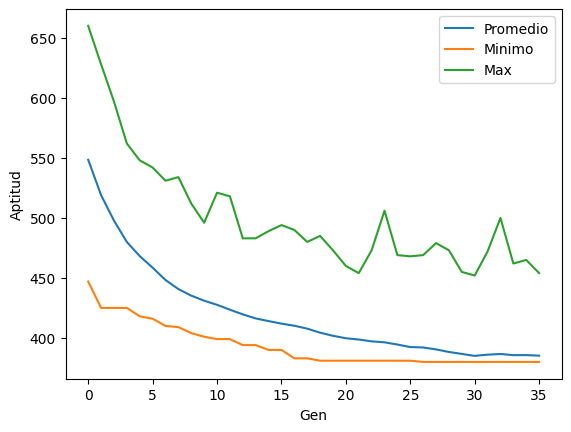

In [142]:
import matplotlib.pyplot as plt


gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()